In [152]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
import tensorflow as tf
from pathlib import Path
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import random 


# Path to the data
file_path = Path("Resources/Cars.xlsx")

# Read in CSV file
table_df = pd.read_excel(file_path)

# Fix the year
table_df['Year'] = table_df['Year'].fillna(0).astype(int)
table_df.tail(5)

,Month,Year,Not seasonally adjusted (Thousands),"Combined seasonal, trading-day factor",Seasonally adjusted (Thousands),Seasonally adjusted at annual rates (Millions)
676,May,2023,205.765,105.85,194.393009,2.332716
677,June,2023,206.552,106.45,194.036637,2.328440
678,July,2023,191.771,97.20,197.295267,2.367543
679,August,2023,190.848,100.05,190.752624,2.289031
680,September,2023,196.482,101.45,193.673731,2.324085


In [153]:
# Print out column names
print(table_df.columns)

Index(['Month', 'Year', 'Not seasonally adjusted (Thousands)',
       'Combined seasonal, trading-day factor',
       'Seasonally adjusted  (Thousands)',
       'Seasonally adjusted at annual rates (Millions)'],
      dtype='object')


In [154]:
# Create a new df with only the needed columns 
final_df = table_df[['Month', 'Year', 'Seasonally adjusted  (Thousands)']]
print(final_df)

         Month  Year  Seasonally adjusted  (Thousands)
0      January  1967                        653.100000
1     February  1967                        570.800000
2        March  1967                        601.700000
3        April  1967                        680.300000
4          May  1967                        663.400000
..         ...   ...                               ...
676        May  2023                        194.393009
677       June  2023                        194.036637
678       July  2023                        197.295267
679     August  2023                        190.752624
680  September  2023                        193.673731

[681 rows x 3 columns]


In [155]:
# Find the minimum and maximum values in the dataset
min_value = final_df['Seasonally adjusted  (Thousands)'].min()
max_value = final_df['Seasonally adjusted  (Thousands)'].max()

print("Minimum Value:", min_value)
print("Maximum Value:", max_value)

Minimum Value: 116.96348314606742
Maximum Value: 959.9


In [156]:
# Manually adding in the remaning months in 2023 
new_row = {'Month': 'October', 'Year': 2023, 'Seasonally adjusted  (Thousands)': 197}
final_df= final_df.append(new_row, ignore_index=True)
nov_row = {'Month': 'November', 'Year': 2023, 'Seasonally adjusted  (Thousands)': 205}
final_df= final_df.append(nov_row, ignore_index=True)
dec_row = {'Month': 'December', 'Year':2023, 'Seasonally adjusted  (Thousands)': 209}
final_df= final_df.append(dec_row, ignore_index=True)
print(final_df)

         Month  Year  Seasonally adjusted  (Thousands)
0      January  1967                        653.100000
1     February  1967                        570.800000
2        March  1967                        601.700000
3        April  1967                        680.300000
4          May  1967                        663.400000
..         ...   ...                               ...
679     August  2023                        190.752624
680  September  2023                        193.673731
681    October  2023                        197.000000
682   November  2023                        205.000000
683   December  2023                        209.000000

[684 rows x 3 columns]


C:\Users\19517\AppData\Local\Temp\ipykernel_5424\2154490383.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df= final_df.append(new_row, ignore_index=True)
C:\Users\19517\AppData\Local\Temp\ipykernel_5424\2154490383.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df= final_df.append(nov_row, ignore_index=True)
C:\Users\19517\AppData\Local\Temp\ipykernel_5424\2154490383.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df= final_df.append(dec_row, ignore_index=True)


In [157]:
# Define a list of years from 2024 to 2028
years = list(range(2024, 2029))

# Loop through the years and months to add future rows with 'Seasonally adjusted  (Thousands)' equal to a range of values
for year in years:
    for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']:
        new_row = {
            'Month': month,
            'Year': year,
            'Seasonally adjusted  (Thousands)': random.uniform(230, 350)
        }
        final_df = final_df.append(new_row, ignore_index=True)

# Display the final DataFrame
print(final_df)

         Month  Year  Seasonally adjusted  (Thousands)
0      January  1967                        653.100000
1     February  1967                        570.800000
2        March  1967                        601.700000
3        April  1967                        680.300000
4          May  1967                        663.400000
..         ...   ...                               ...
739     August  2028                        295.583933
740  September  2028                        234.423734
741    October  2028                        301.005913
742   November  2028                        258.680566
743   December  2028                        308.035101

[744 rows x 3 columns]


C:\Users\19517\AppData\Local\Temp\ipykernel_5424\3608911519.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index=True)
C:\Users\19517\AppData\Local\Temp\ipykernel_5424\3608911519.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index=True)
C:\Users\19517\AppData\Local\Temp\ipykernel_5424\3608911519.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index=True)
C:\Users\19517\AppData\Local\Temp\ipykernel_5424\3608911519.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(

In [158]:
print(final_df.columns)

Index(['Month', 'Year', 'Seasonally adjusted  (Thousands)'], dtype='object')


In [159]:
# Extract the target variable
data = final_df['Seasonally adjusted  (Thousands)'].values

# Normalize the data 
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

# Define a function to prepare the data
def prepare_sequence_data(data, time_steps):
    X, y, months, years = [], [], [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)].flatten())  # Flatten the sequence
        y.append(data[(i + 1):(i + time_steps + 1)].flatten())  # Flatten and Predict the next sequence
        months.append(final_df['Month'].iloc[i + time_steps])
        years.append(final_df['Year'].iloc[i + time_steps])
    return np.array(X), np.array(y), months, years

# Set the number of time steps and split the data
time_steps = 10  
X, y, months, years = prepare_sequence_data(data, time_steps)
X_train, X_test, y_train, y_test, months_train, months_test, years_train, years_test = train_test_split(X, y, months, years, test_size=0.2, shuffle=False)

# Build the LSTM model for forecasting
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled data to the original scale
y_test_original_scale = scaler.inverse_transform(y_test[:, -1].reshape(-1, 1))  
y_pred_original_scale = scaler.inverse_transform(y_pred[:, -1].reshape(-1, 1))

# Create a DataFrame with the original-scale data, months, and years
df = pd.DataFrame({'Month': months_test, 'Year': years_test, 'Actual': y_test_original_scale.flatten(), 'Predicted': y_pred_original_scale.flatten()})

Epoch 1/150
17/17 [==============================] - 2s 19ms/step - loss: 0.2574 - val_loss: 0.0645
Epoch 2/150
17/17 [==============================] - 0s 6ms/step - loss: 0.1095 - val_loss: 0.0264
Epoch 3/150
17/17 [==============================] - 0s 6ms/step - loss: 0.0659 - val_loss: 0.0194
Epoch 4/150
17/17 [==============================] - 0s 5ms/step - loss: 0.0525 - val_loss: 0.0159
Epoch 5/150
17/17 [==============================] - 0s 5ms/step - loss: 0.0414 - val_loss: 0.0111
Epoch 6/150
17/17 [==============================] - 0s 5ms/step - loss: 0.0326 - val_loss: 0.0101
Epoch 7/150
17/17 [==============================] - 0s 5ms/step - loss: 0.0276 - val_loss: 0.0082
Epoch 8/150
17/17 [==============================] - 0s 6ms/step - loss: 0.0240 - val_loss: 0.0071
Epoch 9/150
17/17 [==============================] - 0s 5ms/step - loss: 0.0208 - val_loss: 0.0058
Epoch 10/150
17/17 [==============================] - 0s 5ms/step - loss: 0.0179 - val_loss: 0.0042
Epoch 11

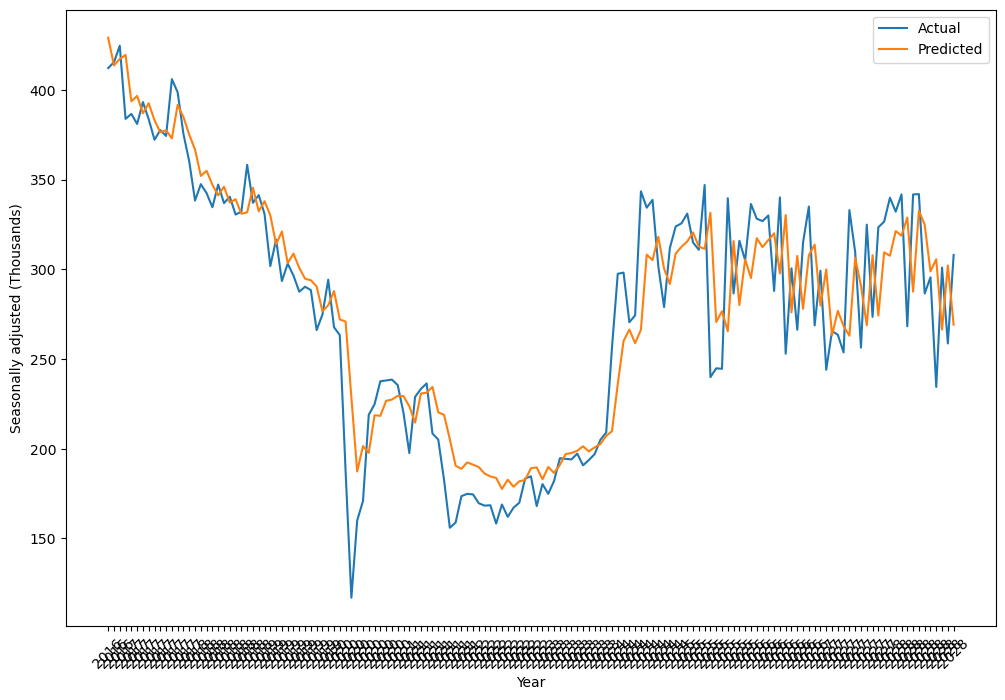

In [160]:
# Define years_test by extracting the corresponding years for the test data
years_test = final_df['Year'].values[-len(y_test):]

# Plot actual vs. predicted values 
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(years_test)), y_test_original_scale, label='Actual')
plt.plot(np.arange(len(years_test)), y_pred_original_scale, label='Predicted')

# Set the x-axis ticks and labels as the year and rotate them for readability (didn't really work)
plt.xticks(np.arange(len(years_test)), years_test, rotation=45)
plt.xlabel('Year')
plt.ylabel('Seasonally adjusted (Thousands)')
plt.legend()
plt.show()

In [161]:
print(df.head(10))

      Month  Year      Actual   Predicted
0   October  2016  412.181594  429.107758
1  November  2016  415.455491  413.667999
2  December  2016  424.656611  417.248505
3   January  2017  383.866789  419.569122
4  February  2017  386.635862  393.656219
5     March  2017  381.052533  396.659973
6     April  2017  393.260270  387.014130
7       May  2017  383.693444  392.605621
8      June  2017  372.247837  383.126526
9      July  2017  377.587577  376.404755


In [166]:
# Saving the results to a csv file
df.to_csv('future_predictions.csv', index=False)